In [122]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

### Exercise 1 - Modeling prior priedictive distribution

In [123]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(fixed_param=True,
                           iter_sampling=1000,
                           iter_warmup=0, 
                           chains = 1)
df = samples.draws_pd()
df["y"] = df["y"] / df["N"]
mean = df["y"].mean()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


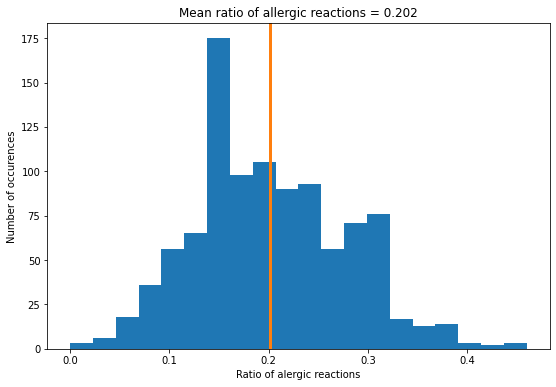

Mean of the ratio is consistant with real-world knowledge


In [124]:
plt.figure(figsize=(9, 6))
plt.hist(df["y"], bins="auto")
axes = plt.gca()
ylim = axes.get_ylim()
plt.plot([mean, mean], [0, 1000], linewidth=3)
axes.set_ylim(ylim)
plt.title("Mean ratio of allergic reactions = {:.3f}".format(mean))
plt.xlabel("Ratio of alergic reactions")
plt.ylabel("Number of occurences")
plt.show()
print("Mean of the ratio is consistant with real-world knowledge")

### Exercise 2 - Modeling posterior and posterior predictive distribution

In [125]:
gen_quant = CmdStanModel(stan_file='code_2.stan')
samples = gen_quant.sample(data={"N": 50, "y": 2},
                           fixed_param=True,
                           iter_sampling=1000,
                           iter_warmup=0, 
                           chains = 1)
df = samples.draws_pd()
df["y_pred"] = df["y_pred"] / 50

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


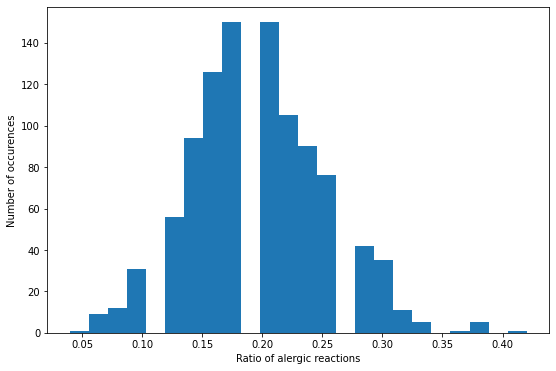

In [126]:
plt.figure(figsize=(9, 6))
plt.hist(df["y_pred"], bins="auto")
plt.xlabel("Ratio of alergic reactions")
plt.ylabel("Number of occurences")
plt.show()

In [127]:
expexted_ratio = df["y_pred"].mean()
ratio_interval = az.hdi(df["y_pred"].to_numpy(), credible_interval=0.94)

expected_p = df["p"].mean()
p_interval = az.hdi(df["p"].to_numpy(), credible_interval=0.94)

prob_ratio_lower = np.sum(df["y_pred"] < 0.2) / len(df["y_pred"])

print("Expected ratio = {:.3f}".format(expexted_ratio))
print("94% density interval of the predicted ratio = ", ratio_interval)

print("\nExpected value of parameter p = {:.3f}".format(expected_p))
print("94% density interval of the parameter p = ", p_interval)

print("\nProbability that ratio is lower than the average probability = {:.3f}".format(prob_ratio_lower))

Expected ratio = 0.196
94% density interval of the predicted ratio =  [0.1 0.3]

Expected value of parameter p = 0.199
94% density interval of the parameter p =  [0.198849 0.198849]

Probability that ratio is lower than the average probability = 0.479
